In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv(r'C:\Users\Ice Asortse\Desktop\Traffic_Violations.csv')

In [3]:
df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,fbc324ab-bc8d-4743-ba23-7f9f370005e1,8/11/2019,20:02:00,MCP,"2nd District, Bethesda","LEAVING UNATTENDED VEH. W/O STOPPING ENGINE, L...",CORDELL ST @ NORFOLK AVE.,38.989743,-77.097770,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-1101(a),NaN,NaN,MD,02 - Automobile,2016.0,TOYOTA,CAMRY,SILVER,Citation,21-1101(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9897433333333, -77.09777)"
1,a6d904ec-d666-4bc3-8984-f37a4b31854d,8/12/2019,13:41:00,MCP,"2nd District, Bethesda",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 85 MPH I...,NBI270 AT MIDDLEBROOK RD,39.174110,-77.246170,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-801.1,NaN,NaN,MD,02 - Automobile,2016.0,HONDA,CIVIC,GRAY,Citation,21-801.1,Transportation Article,False,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.17411, -77.24617)"
2,54a64f6a-df28-4b65-a335-08883866aa46,8/12/2019,21:00:00,MCP,"5th District, Germantown",DRIVING VEH W/ TV-TYPE RECEIVING VIDEO EQUIP T...,MIDDLEBROOK AN 355,39.182016,-77.238221,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-1129,NaN,NaN,MD,02 - Automobile,2016.0,KIA,SDN,SILVER,Citation,21-1129,Transportation Article,False,BLACK,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1820155, -77.2382213333333)"
3,cf5479b6-9bc7-4216-a7b2-99e57ae932af,8/12/2019,21:43:00,MCP,"5th District, Germantown",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GERMANTOWN RD AND ALE HOUSE,39.160508,-77.284023,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-401(h),NaN,NaN,MD,02 - Automobile,2003.0,TOYOTA,SOLARA,BLACK,Citation,13-401(h),Transportation Article,False,BLACK,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1605076666667, -77.284023)"
4,5601ca35-8ee7-4f8e-9208-d89cde96d469,8/12/2019,21:30:00,MCP,"2nd District, Bethesda",FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,EASTWEST/ 355,38.984247,-77.090548,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,21-201(a1),NaN,NaN,MD,02 - Automobile,2001.0,NISSAN,MAXIMA,SILVER,Citation,16-116(a),Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9842466666667, -77.0905483333333)"


In [4]:
df.shape

(1048575, 43)

In [5]:
df.info

<bound method DataFrame.info of                                         SeqID Date Of Stop Time Of Stop  \
0        fbc324ab-bc8d-4743-ba23-7f9f370005e1    8/11/2019     20:02:00   
1        a6d904ec-d666-4bc3-8984-f37a4b31854d    8/12/2019     13:41:00   
2        54a64f6a-df28-4b65-a335-08883866aa46    8/12/2019     21:00:00   
3        cf5479b6-9bc7-4216-a7b2-99e57ae932af    8/12/2019     21:43:00   
4        5601ca35-8ee7-4f8e-9208-d89cde96d469    8/12/2019     21:30:00   
...                                       ...          ...          ...   
1048570  ba2c9138-fb18-4949-8923-840454529d1e   10/15/2018      7:25:00   
1048571  ba2c9138-fb18-4949-8923-840454529d1e   10/15/2018      7:25:00   
1048572  69710f76-91e2-4ac7-9256-0f8a7588820f   10/15/2018      7:48:00   
1048573  69710f76-91e2-4ac7-9256-0f8a7588820f   10/15/2018      7:48:00   
1048574  fd371547-6c8c-42b1-acba-4b92ed2093ee   10/22/2018      9:34:00   

        Agency                 SubAgency  \
0          MCP    2nd D

In [6]:
df.describe()

,Latitude,Longitude,Year
count,1.048575e+06,1.048575e+06,1.042484e+06
mean,3.587674e+01,-7.078522e+01,2.005591e+03
std,1.072751e+01,2.116567e+01,8.945562e+01
min,0.000000e+00,-9.461099e+01,0.000000e+00
25%,3.901409e+01,-7.718641e+01,2.002000e+03
50%,3.906301e+01,-7.708019e+01,2.006000e+03
75%,3.912854e+01,-7.702406e+01,2.011000e+03
max,4.154316e+01,3.906443e+01,9.999000e+03


In [7]:
df.isna().any()

SeqID                      False
Date Of Stop               False
Time Of Stop               False
Agency                     False
SubAgency                  False
Description                 True
Location                    True
Latitude                   False
Longitude                  False
Accident                   False
Belts                      False
Personal Injury            False
Property Damage            False
Fatal                      False
Commercial License         False
HAZMAT                     False
Commercial Vehicle         False
Alcohol                    False
Work Zone                  False
Search Conducted            True
Search Disposition          True
Search Outcome              True
Search Reason               True
Search Reason For Stop      True
Search Type                 True
Search Arrest Reason        True
State                       True
VehicleType                False
Year                        True
Make                        True
Model     

In [8]:
df.isna().sum()

SeqID                            0
Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                      7
Location                         1
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
Search Conducted            609497
Search Disposition          991293
Search Outcome              628482
Search Reason               991293
Search Reason For Stop      609649
Search Type                 991300
Search Arrest Reason       1006044
State                           56
VehicleType                      0
Year                

In [9]:
duplicates = df[df.duplicated()]
print(len(duplicates))

1593


In [10]:
df.drop_duplicates(keep='first',inplace=True) 

In [11]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [12]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n\n')

SeqID 
 33c49de3-9e36-4f36-9326-b59a95e86fe8    0.000056
28c5bfc1-5670-4751-be16-e1d83cda20f0    0.000040
859768f4-bde0-427b-a60f-07b1e2aaadc4    0.000037
c474e98e-128c-40e0-a487-d988cc67f0bd    0.000037
42ee969e-cc65-4557-bc1a-cefa6b35cba8    0.000036
8fe624e5-2bef-4cf9-963b-58fbb1e206c2    0.000035
d8c32585-3c35-4862-987b-aa65d36a53db    0.000033
1f0803c8-b026-4f42-a04b-a3c43404e26f    0.000032
5b92200b-57e1-4483-9e03-81af3fb39492    0.000032
7d670eaa-2148-4f25-b236-f81a51501894    0.000032
Name: SeqID, dtype: float64 


Date Of Stop 
 3/5/2019     0.001132
7/8/2014     0.000831
5/22/2012    0.000831
5/10/2012    0.000802
5/6/2014     0.000763
7/7/2014     0.000761
5/20/2014    0.000754
1/25/2017    0.000745
3/24/2014    0.000740
5/16/2012    0.000739
Name: Date Of Stop, dtype: float64 


Time Of Stop 
 23:30:00    0.001382
23:20:00    0.001281
23:00:00    0.001276
22:53:00    0.001267
22:50:00    0.001245
23:15:00    0.001238
23:12:00    0.001216
22:35:00    0.001194
23:35:00    0.0

Article 
 Transportation Article    0.987335
Maryland Rules            0.012622
BR                        0.000021
TG                        0.000018
1A                        0.000004
Name: Article, dtype: float64 


Contributed To Accident 
 False    0.963103
True     0.036897
Name: Contributed To Accident, dtype: float64 


Race 
 WHITE              0.355231
BLACK              0.312978
HISPANIC           0.225017
ASIAN              0.053508
OTHER              0.051445
NATIVE AMERICAN    0.001821
Name: Race, dtype: float64 


Gender 
 M    0.683735
F    0.314613
U    0.001652
Name: Gender, dtype: float64 


Driver City 
 SILVER SPRING         0.242071
GAITHERSBURG          0.104090
GERMANTOWN            0.084384
ROCKVILLE             0.078248
WASHINGTON            0.030466
BETHESDA              0.026692
MONTGOMERY VILLAGE    0.026244
HYATTSVILLE           0.024851
POTOMAC               0.020262
OLNEY                 0.016932
Name: Driver City, dtype: float64 


Driver State 
 MD    0

In [13]:
df.replace(['?',], np.nan, inplace=True)

In [14]:
#make list of var containing missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>1]

#print var name and % of missing values
for var in vars_with_na:
    print(var, np.round(df[var].isnull().mean(),3), '% missing values')

Description 0.0 % missing values
Search Conducted 0.581 % missing values
Search Disposition 0.946 % missing values
Search Outcome 0.6 % missing values
Search Reason 0.946 % missing values
Search Reason For Stop 0.582 % missing values
Search Type 0.946 % missing values
Search Arrest Reason 0.96 % missing values
State 0.0 % missing values
Year 0.006 % missing values
Make 0.0 % missing values
Model 0.0 % missing values
Color 0.013 % missing values
Article 0.021 % missing values
Driver City 0.0 % missing values
Driver State 0.0 % missing values
DL State 0.001 % missing values


In [15]:
drop_column = ['SeqID','Agency','Description','Location','Latitude','Longitude','Accident', 'Belts','Personal Injury', 'Property Damage','Fatal','Commercial License','HAZMAT','Commercial Vehicle','Alcohol','Work Zone','Search Conducted','Search Disposition','Search Outcome','Search Reason','Search Reason For Stop','Search Type','Search Arrest Reason','VehicleType','Model','Color','Violation Type','Charge','Article','Contributed To Accident','Arrest Type','Geolocation']
df.drop(drop_column, axis=1, inplace=True)

In [16]:
data = df.dropna()

In [17]:
data.shape

(1039614, 11)

In [18]:
data.isna().sum()

Date Of Stop    0
Time Of Stop    0
SubAgency       0
State           0
Year            0
Make            0
Race            0
Gender          0
Driver City     0
Driver State    0
DL State        0
dtype: int64

In [19]:
data.isnull().sum()

Date Of Stop    0
Time Of Stop    0
SubAgency       0
State           0
Year            0
Make            0
Race            0
Gender          0
Driver City     0
Driver State    0
DL State        0
dtype: int64

In [20]:
data.shape

(1039614, 11)

In [21]:
data.head()

,Date Of Stop,Time Of Stop,SubAgency,State,Year,Make,Race,Gender,Driver City,Driver State,DL State
0,8/11/2019,20:02:00,"2nd District, Bethesda",MD,2016.0,TOYOTA,BLACK,M,SILVER SPRING,MD,MD
1,8/12/2019,13:41:00,"2nd District, Bethesda",MD,2016.0,HONDA,WHITE,M,SILVER SPRING,MD,MD
2,8/12/2019,21:00:00,"5th District, Germantown",MD,2016.0,KIA,BLACK,M,GAITHERSBURG,MD,MD
3,8/12/2019,21:43:00,"5th District, Germantown",MD,2003.0,TOYOTA,BLACK,M,GERMANTOWN,MD,MD
4,8/12/2019,21:30:00,"2nd District, Bethesda",MD,2001.0,NISSAN,BLACK,M,SILVER SPRING,MD,MD


In [22]:
pd.DataFrame(data['State'].value_counts()/len(data)).nlargest(15, columns = ['State'])

,State
MD,0.873714
VA,0.046304
DC,0.024524
PA,0.007473
TX,0.004982
WV,0.004617
FL,0.004617
NC,0.003879
NY,0.003157
NJ,0.002821


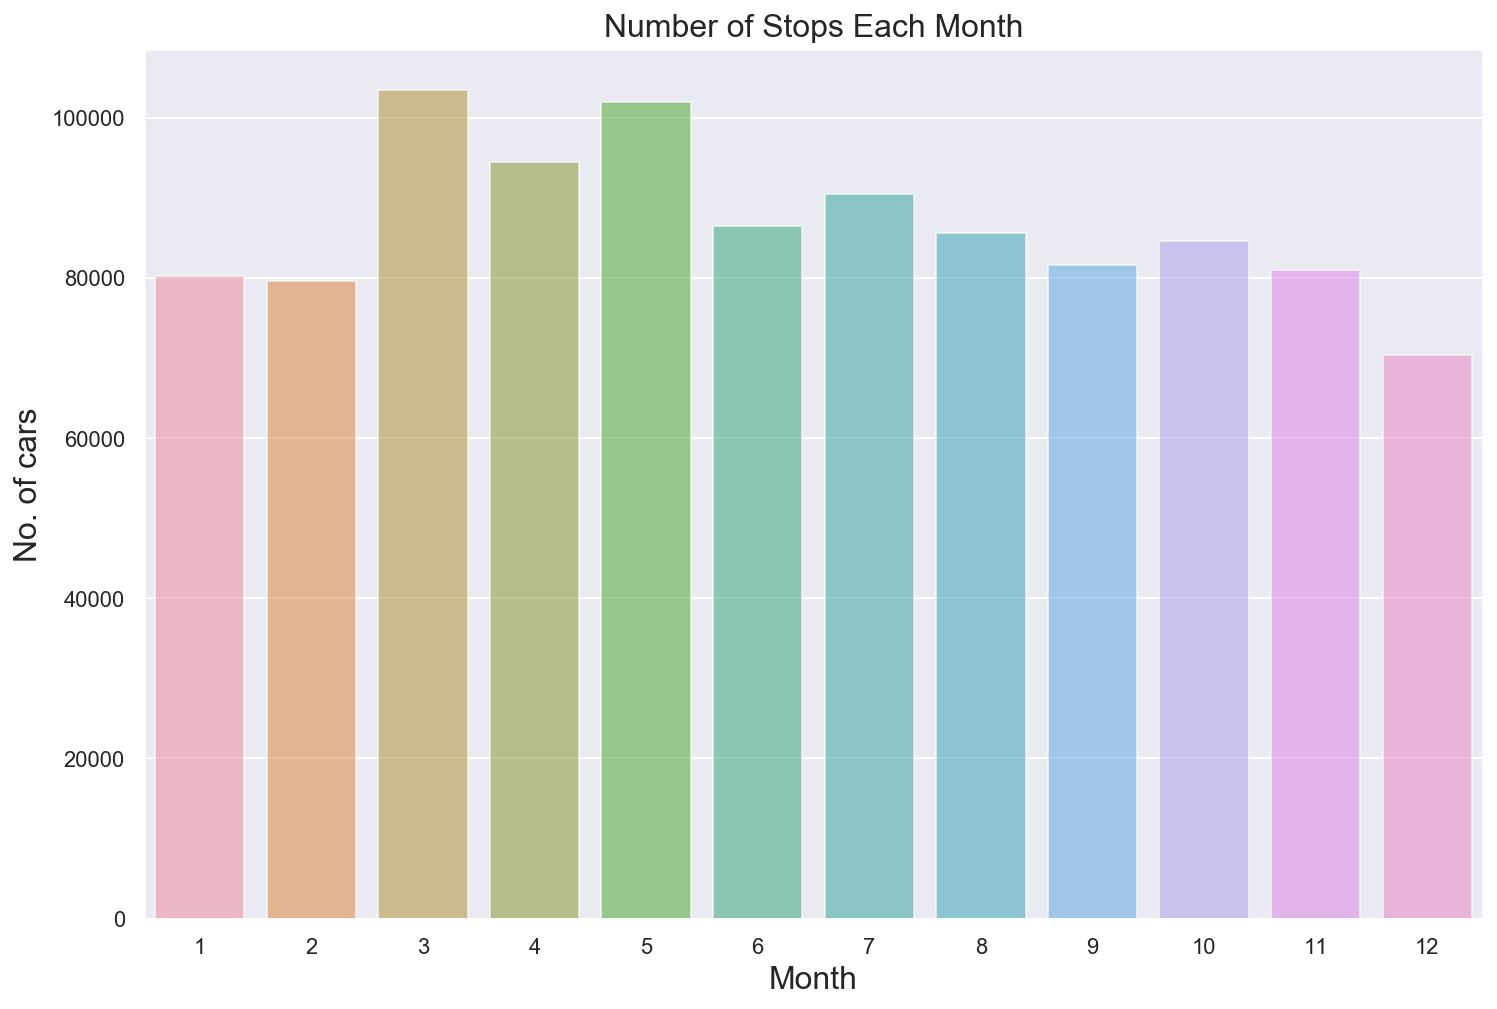

In [23]:
month = []
for time_stamp in pd.to_datetime(data['Date Of Stop']):
    month.append(time_stamp.month)
m_count = pd.Series(month).value_counts()

plt.figure(figsize=(12,8))
sns.barplot(y=m_count.values, x=m_count.index, alpha=0.6)
plt.title("Number of Stops Each Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();

In [24]:
pd.DataFrame(data['Year'].value_counts()).nlargest(10, columns = ['Year'])

,Year
2006.0,62338
2007.0,61941
2005.0,60939
2004.0,59737
2003.0,56592
2008.0,55751
2012.0,55601
2013.0,52385
2011.0,52221
2002.0,51660


In [25]:
pd.DataFrame(data['Race'].value_counts()).nlargest(10, columns = ['Race'])

,Race
WHITE,370019
BLACK,324879
HISPANIC,233716
ASIAN,55756
OTHER,53354
NATIVE AMERICAN,1890


In [26]:
pd.DataFrame(data['Gender'].value_counts()).nlargest(10, columns = ['Gender'])

,Gender
M,710771
F,327357
U,1486


TypeError: 'AxesSubplot' object does not support indexing

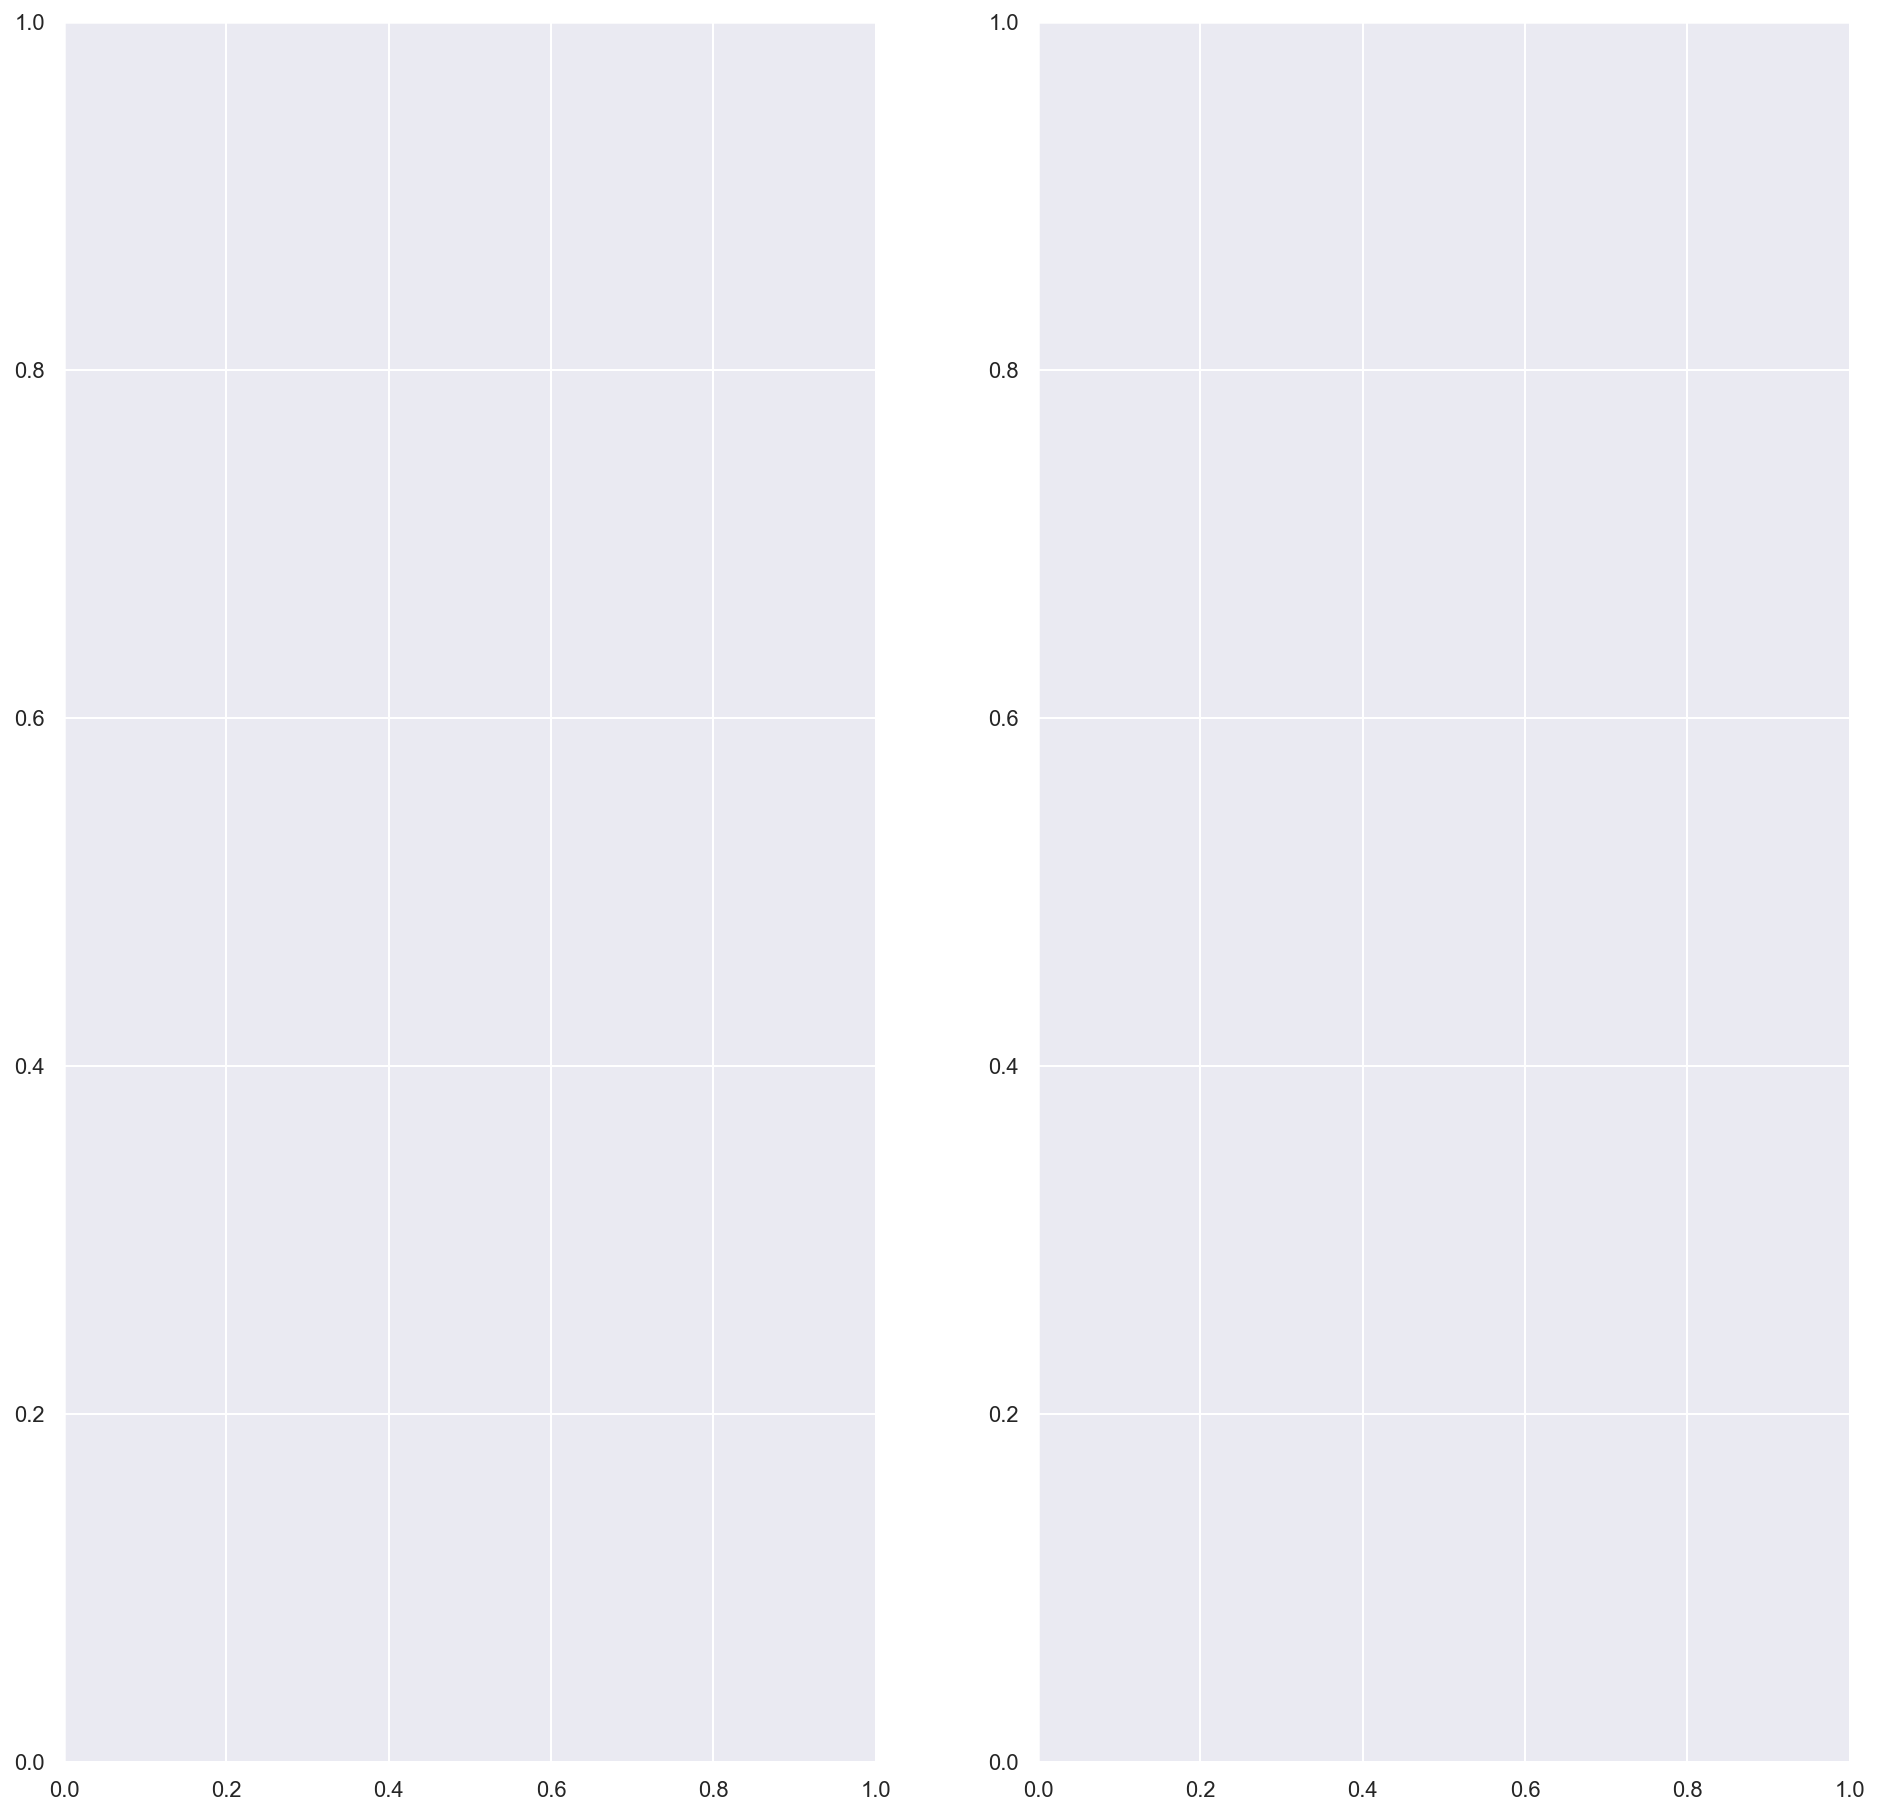

In [27]:
f, axarr = plt.subplots(1, 2 , figsize=(16, 16))

f.subplots_adjust(hspace=0.5)

sns.countplot(df['Gender'], ax=axarr[0][0], color='salmon')
axarr[0][0].set_title("Gender", fontsize=14)

sns.countplot(df['Race'], ax=axarr[0][1], color='salmon')
axarr[0][1].set_title("Race", fontsize=14)

sns.despine()


In [28]:
violation_county = pd.DataFrame(data['Driver City'].
 value_counts()/len(data)).nlargest(10, columns = ['Driver City'])

In [29]:
violation_county

,Driver City
SILVER SPRING,0.241503
GAITHERSBURG,0.104176
GERMANTOWN,0.084443
ROCKVILLE,0.078319
WASHINGTON,0.030220
BETHESDA,0.026659
MONTGOMERY VILLAGE,0.026251
HYATTSVILLE,0.024796
POTOMAC,0.020347
OLNEY,0.016997


In [ ]:
|